## Predicting student grade using the hours they studied

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#sns.set_style()

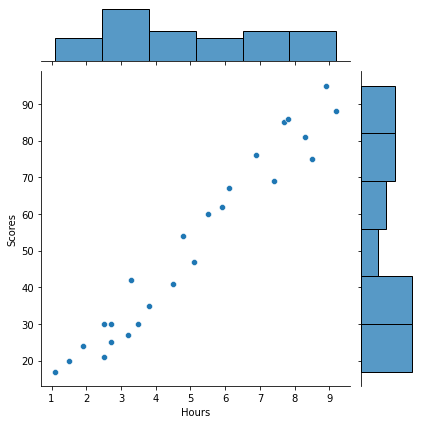

In [7]:
#plt.figure(figsize=(4,4))
#from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,8.27
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot(x = 'Hours',y = 'Scores', data = data)
plt.show()

In [8]:
x = data.iloc[:,:-1].values

In [9]:
y = data.iloc[:,1:].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.32)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

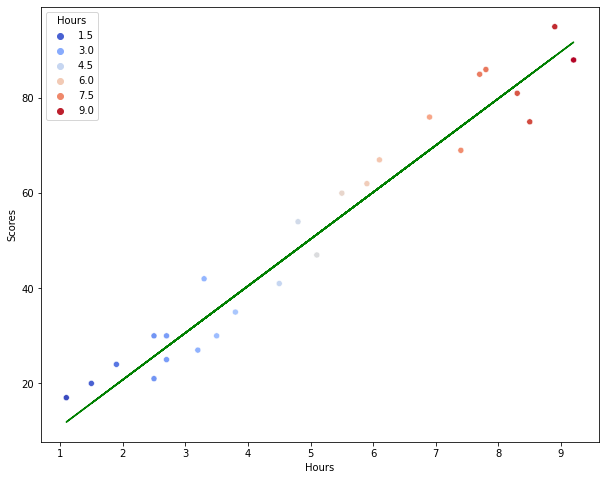

In [16]:
plt.figure(figsize=(10,8))
line = regressor.coef_*x+regressor.intercept_
# Plotting for the test data
sns.scatterplot(x = 'Hours',y = 'Scores', data = data,hue='Hours',palette='coolwarm')
plt.plot(x,line,'green');
plt.show()

In [17]:
regressor.predict([[9.25]])
#calculating the score when students studies for 7 hrs

array([[92.23262475]])

In [18]:
y_test = y_test.flatten()
y_pred = y_pred.flatten()

In [19]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [20]:
df

,Actual,Predicted
0,30,27.651394
1,81,82.865881
2,67,61.174476
3,24,19.763610
4,30,25.679448
5,86,77.936016
6,42,33.567232
7,30,35.539178


In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test, y_pred)
#r2

0.9449267297535272

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_test, y_pred, squared=False)
#rmse

5.549439999310694

In [25]:
mean_squared_error(y_test, y_pred)
#mse

30.796284305949477

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mean_absolute_error(y_test, y_pred)

5.079110491890817